In [1]:
import os
import time
import json
import argparse
from os.path import join, exists, splitext, basename
from imp import reload
from glob import glob

import datetime
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import RandomState
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.utils.data
import torch.optim as optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader

from imp import reload
import models
from models import *
import utils 
from utils import * 

plt.style.use("ggplot")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

labeledのみ，folderからとりだして訓練する

In [2]:
mnist_labeled_path  = "./data/labeled_mnist_image"
if not exists(mnist_labeled_path):
    for i in range(10):
        os.makedirs(join(mnist_labeled_path, "{}".format(i)))

In [3]:
batch_size = 100

transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = datasets.MNIST('data/mnist', train=True, download=True, transform=transform)
unlabel_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_test = datasets.MNIST('data/mnist', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

In [4]:
dataset = datasets.MNIST('data/mnist', train=True, download=True)

for i in range(len(dataset)):
    for j in range(10):
        if (dataset[i][1]==j) and (len(glob(join(mnist_labeled_path, "{}/*".format(j)))) < 10):
            dataset[i][0].save(join(mnist_labeled_path, "{}/{}.png".format(j, i)))
    if len(glob(join(mnist_labeled_path, "*/*"))) == 100:
        break
        
labeled_dataset = datasets.ImageFolder(mnist_labeled_path, transform=transform)
label_loader = DataLoader(labeled_dataset, batch_size=batch_size, shuffle=True)

In [5]:
a, b = iter(label_loader).next()

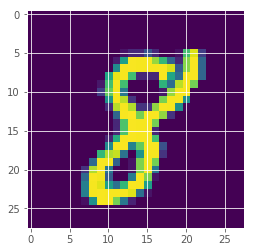

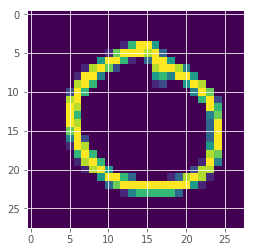

In [6]:
for i in range(2):
    plt.imshow(a[i][0].detach().cpu().numpy())
    plt.show()

In [7]:
b

tensor([ 8,  0,  2,  2,  7,  9,  3,  8,  5,  6,  8,  6,  2,  5,
         0,  5,  0,  3,  4,  8,  6,  8,  4,  7,  3,  0,  6,  3,
         8,  2,  0,  2,  7,  5,  6,  1,  7,  7,  6,  4,  0,  3,
         7,  4,  8,  4,  3,  5,  0,  2,  9,  9,  3,  1,  0,  1,
         9,  1,  5,  3,  1,  2,  7,  9,  0,  1,  4,  3,  6,  5,
         7,  9,  0,  9,  4,  5,  2,  4,  9,  9,  7,  2,  1,  1,
         8,  9,  1,  8,  5,  5,  2,  6,  6,  8,  4,  6,  3,  1,
         4,  7])